<a href="https://colab.research.google.com/github/siddarthreddygsr/FACE-MASK-DETECTION/blob/master/face_mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'/content/drive/MyDrive/train_dataset_facemask'
valid_path = r'/content/drive/MyDrive/test_data_facemask'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/train_dataset_facemask',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/test_data_facemask',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 3593 images belonging to 2 classes.
Found 1314 images belonging to 2 classes.


In [10]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
 44/113 [==========>...................] - ETA: 18:32 - loss: 0.0428 - accuracy: 0.9906

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


113/113 [==============================] - 2500s 22s/step - loss: 0.0514 - accuracy: 0.9864 - val_loss: 0.1964 - val_accuracy: 0.9224
Epoch 2/5
113/113 [==============================] - 2490s 22s/step - loss: 0.0280 - accuracy: 0.9933 - val_loss: 0.1488 - val_accuracy: 0.9513
Epoch 3/5
113/113 [==============================] - 2493s 22s/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.1528 - val_accuracy: 0.9475
Epoch 4/5
113/113 [==============================] - 2483s 22s/step - loss: 0.0170 - accuracy: 0.9964 - val_loss: 0.2252 - val_accuracy: 0.9330
Epoch 5/5
113/113 [==============================] - 2488s 22s/step - loss: 0.0206 - accuracy: 0.9942 - val_loss: 0.1715 - val_accuracy: 0.9482


In [11]:
import tensorflow as tf
from keras.models import load_model

In [12]:
model.save("mask_detector.h5")

In [13]:
model = load_model("/content/mask_detector.h5")
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
'''=================================================================================================
                            Loading the model and Predicting the output'''

'=================================================================================================\n                            Loading the model and Predicting the output'

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image

image_path = "/content/drive/MyDrive/2.jpg"

img = image.load_img( image_path , target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [25]:
predict = model.predict([img])

In [26]:
import cv2

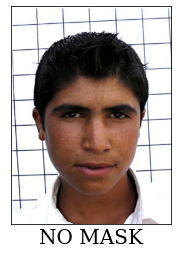

In [27]:
img1 = cv2.imread("/content/drive/MyDrive/2.jpg")
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)

plt.xticks([])
plt.yticks([])



font = {'family': 'serif',
        'color':  'BLACK',
        'weight': 'medium',
        'size': 20,
        }



if predict[0][0] == 1 :
  plt.xlabel("MASK" , fontdict = font)

if predict[0][1] == 1 :
  plt.xlabel("NO MASK" , fontdict = font) 


plt.show()

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image

image_path = "/content/drive/MyDrive/1-respirator-mask.jpg"

img = image.load_img( image_path , target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [31]:
predict = model.predict([img])

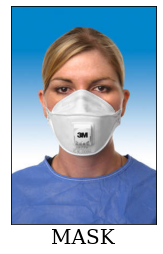

In [35]:
img1 = cv2.imread("/content/drive/MyDrive/1-respirator-mask.jpg")
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)
plt.imshow(img1)

plt.xticks([])
plt.yticks([])



font = {'family': 'serif',
        'color':  'BLACK',
        'weight': 'medium',
        'size': 20,
        }



if predict[0][0] == 1 :
  plt.xlabel("MASK" , fontdict = font)

if predict[0][1] == 1 :
  plt.xlabel("NO MASK" , fontdict = font) 


plt.show()